## Problem Statement
In a competitive market like the restaurant industry, understanding the factors that influence business success is crucial for stakeholders. Utilizing the Yelp dataset, this project aims to investigate the relationship between user engagement (reviews, tips, and check-ins) and business success metrics (review count, ratings) for restaurants.

## Research Objectives
1. <b>Quantify the correlation between user engagement (reviews, tips, check-ins) and review count/average star rating:</b> This will help us determine if restaurants with higher user engagement experience a corresponding increase in reviews and ratings.
2. <b>Analyze the impact of sentiment on review count and average star rating:</b> We will investigate if positive sentiment in reviews and tips translates to higher star ratings and potentially influences the total number of reviews left.
3. <b>Time trends in User Engagement:</b> We will explore if consistent user engagement over time is a stronger indicator of long-term success compared to sporadic bursts of activity.
   
## Hypothesis Testing
Higher levels of user engagement (more reviews, tips, and check-ins) correlate with higher review counts and ratings for restaurants.

Positive sentiment expressed in reviews and tips contributes to higher overall ratings and review counts for restaurants.

Consistent engagement over time is positively associated with sustained business success for restaurants.

## Importing Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import folium
from datetime import datetime
import sqlite3
from geopy.geocoders import Nominatim
from matplotlib.colors import LinearSegmentedColormap
from IPython.display import display
import warnings
warnings.filterwarnings('ignore')

## Database Connection

In [2]:
# Creating Database Connection

conn = sqlite3.connect('yelp.db')

In [3]:
tables = pd.read_sql_query("select name from sqlite_master where type = 'table'", conn)

In [4]:
tables

,name
0,business
1,checkin
2,review
3,tip
4,user


In [5]:
# Explore what type of data available in the tables:

for table in tables['name']:
    display(pd.read_sql_query(f"select * from {table} limit 5", conn))

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,categories
0,Pns2l4eNsfO8kk83dixA6A,"Abby Rappoport, LAC, CMQ","1616 Chapala St, Ste 2",Santa Barbara,CA,93101,34.426679,-119.711197,5.0,7,0,"Doctors, Traditional Chinese Medicine, Naturop..."
1,mpf3x-BjTdTEA3yCZrAYPw,The UPS Store,87 Grasso Plaza Shopping Center,Affton,MO,63123,38.551126,-90.335695,3.0,15,1,"Shipping Centers, Local Services, Notaries, Ma..."
2,tUFrWirKiKi_TAnsVWINQQ,Target,5255 E Broadway Blvd,Tucson,AZ,85711,32.223236,-110.880452,3.5,22,0,"Department Stores, Shopping, Fashion, Home & G..."
3,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,935 Race St,Philadelphia,PA,19107,39.955505,-75.155564,4.0,80,1,"Restaurants, Food, Bubble Tea, Coffee & Tea, B..."
4,mWMc6_wTdE0EUBKIGXDVfA,Perkiomen Valley Brewery,101 Walnut St,Green Lane,PA,18054,40.338183,-75.471659,4.5,13,1,"Brewpubs, Breweries, Food"


,business_id,date
0,---kPU91CF4Lq2-WlRu9Lw,"2020-03-13 21:10:56, 2020-06-02 22:18:06, 2020..."
1,--0iUa4sNDFiZFrAdIWhZQ,"2010-09-13 21:43:09, 2011-05-04 23:08:15, 2011..."
2,--30_8IhuyMHbSOcNWd6DQ,"2013-06-14 23:29:17, 2014-08-13 23:20:22"
3,--7PUidqRWpRSpXebiyxTg,"2011-02-15 17:12:00, 2011-07-28 02:46:10, 2012..."
4,--7jw19RH9JKXgFohspgQw,"2014-04-21 20:42:11, 2014-04-28 21:04:46, 2014..."


,review_id,user_id,business_id,stars,useful,funny,cool,text,date
0,KU_O5udG6zpxOg-VcAEodg,mh_-eMZ6K5RLWhZyISBhwA,XQfwVwDr-v0ZS3_CbbE5Xw,3.0,0,0,0,"If you decide to eat here, just be aware it is...",2018-07-07 22:09:11
1,BiTunyQ73aT9WBnpR9DZGw,OyoGAe7OKpv6SyGZT5g77Q,7ATYjTIgM3jUlt4UM3IypQ,5.0,1,0,1,I've taken a lot of spin classes over the year...,2012-01-03 15:28:18
2,saUsX_uimxRlCVr67Z4Jig,8g_iMtfSiwikVnbP2etR0A,YjUWPpI6HXG530lwP-fb2A,3.0,0,0,0,Family diner. Had the buffet. Eclectic assortm...,2014-02-05 20:30:30
3,AqPFMleE6RsU23_auESxiA,_7bHUi9Uuf5__HHc_Q8guQ,kxX2SOes4o-D3ZQBkiMRfA,5.0,1,0,1,"Wow! Yummy, different, delicious. Our favo...",2015-01-04 00:01:03
4,Sx8TMOWLNuJBWer-0pcmoA,bcjbaE6dDog4jkNY91ncLQ,e4Vwtrqf-wpJfwesgvdgxQ,4.0,1,0,1,Cute interior and owner (?) gave us tour of up...,2017-01-14 20:54:15


,user_id,business_id,text,date,compliment_count
0,AGNUgVwnZUey3gcPCJ76iw,3uLgwr0qeCNMjKenHJwPGQ,Avengers time with the ladies.,2012-05-18 02:17:21,0
1,NBN4MgHP9D3cw--SnauTkA,QoezRbYQncpRqyrLH6Iqjg,They have lots of good deserts and tasty cuban...,2013-02-05 18:35:10,0
2,-copOvldyKh1qr-vzkDEvw,MYoRNLb5chwjQe3c_k37Gg,It's open even when you think it isn't,2013-08-18 00:56:08,0
3,FjMQVZjSqY8syIO-53KFKw,hV-bABTK-glh5wj31ps_Jw,Very decent fried chicken,2017-06-27 23:05:38,0
4,ld0AperBXk1h6UbqmM80zw,_uN0OudeJ3Zl_tf6nxg5ww,Appetizers.. platter special for lunch,2012-10-06 19:43:09,0


,user_id,name,review_count,yelping_since,useful,funny,cool,elite,friends,fans,...,compliment_more,compliment_profile,compliment_cute,compliment_list,compliment_note,compliment_plain,compliment_cool,compliment_funny,compliment_writer,compliment_photos
0,qVc8ODYU5SZjKXVBgXdI7w,Walker,585,2007-01-25 16:47:26,7217,1259,5994,2007,"NSCy54eWehBJyZdG2iE84w, pe42u7DcCH2QmI81NX-8qA...",267,...,65,55,56,18,232,844,467,467,239,180
1,j14WgRoU_-2ZE1aw1dXrJg,Daniel,4333,2009-01-25 04:35:42,43091,13066,27281,"2009,2010,2011,2012,2013,2014,2015,2016,2017,2...","ueRPE0CX75ePGMqOFVj6IQ, 52oH4DrRvzzl8wh5UXyU0A...",3138,...,264,184,157,251,1847,7054,3131,3131,1521,1946
2,2WnXYQFK0hXEoTxPtV2zvg,Steph,665,2008-07-25 10:41:00,2086,1010,1003,"2009,2010,2011,2012,2013","LuO3Bn4f3rlhyHIaNfTlnA, j9B4XdHUhDfTKVecyWQgyA...",52,...,13,10,17,3,66,96,119,119,35,18
3,SZDeASXq7o05mMNLshsdIA,Gwen,224,2005-11-29 04:38:33,512,330,299,"2009,2010,2011","enx1vVPnfdNUdPho6PH_wg, 4wOcvMLtU6a9Lslggq74Vg...",28,...,4,1,6,2,12,16,26,26,10,9
4,hA5lMy-EnncsH4JoR-hFGQ,Karen,79,2007-01-05 19:40:59,29,15,7,,"PBK4q9KEEBHhFvSXCUirIw, 3FWPpM7KU1gXeOM_ZbYMbA...",1,...,1,0,0,0,1,1,0,0,0,0


## Data Analysis

In [6]:
pd.read_sql_query("select count(*) as row_count from business", conn)

,row_count
0,150346


In [7]:
open_restaurant = pd.read_sql_query("select business_id, review_count from business where lower(categories) like '%restaurant%' and is_open = 1", conn)

open_restaurant

,business_id,review_count
0,MTSW4McQd7CbVtyjqoe9mw,80
1,CF33F8-E6oudUQ46HnavjQ,6
2,bBDDEgkFA1Otx9Lfe7BZUQ,10
3,eEOYSgkmpB90uNA7lDOMRA,10
4,il_Ro8jwPlHresjw9EGmBg,28
...,...,...
34999,w_4xUt-1AyY2ZwKtnjW0Xg,998
35000,l9eLGG9ZKpLJzboZq-9LRQ,11
35001,cM6V90ExQD6KMSU3rRB5ZA,33
35002,WnT9NIzQgLlILjPT0kEcsQ,35


In [8]:
# What is descriptive stats for review count and star rating for business?
# avg, max, min, median

pd.read_sql_query(f"""select avg(review_count),
min(review_count),
max(review_count), 
(select review_count from business order by review_count limit 1 offset (select count(*) from business)/ 2) as median_review_count,
avg(stars), 
min(stars),
max(stars), 
(select stars from business order by stars limit 1 offset (select count(*) from business)/ 2) as median_star_rating
from business where business_id IN {tuple(open_restaurant['business_id'])}""", conn).transpose()

,0
avg(review_count),104.097789
min(review_count),5.000000
max(review_count),7568.000000
median_review_count,15.000000
avg(stars),3.523969
min(stars),1.000000
max(stars),5.000000
median_star_rating,3.500000


In [9]:
# functon to remove outliers

def remove_outliers(df, col):
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3 - q1
    lower_fence = q1 - 1.5*iqr
    higher_fence = q3 + 1.5*iqr
    df = df[(df[col] >= lower_fence) & (df[col] <= higher_fence)]
    return df

In [10]:
open_restaurant = remove_outliers(open_restaurant, 'review_count')

In [11]:
# descriptive stats after removing ouutliers

pd.read_sql_query(f"""select avg(review_count),
min(review_count),
max(review_count), 
(select review_count from business order by review_count limit 1 offset (select count(*) from business)/ 2) as median_review_count,
avg(stars), 
min(stars),
max(stars), 
(select stars from business order by stars limit 1 offset (select count(*) from business)/ 2) as median_star_rating
from business where business_id IN {tuple(open_restaurant['business_id'])}""", conn).transpose()

,0
avg(review_count),55.975426
min(review_count),5.000000
max(review_count),248.000000
median_review_count,15.000000
avg(stars),3.477281
min(stars),1.000000
max(stars),5.000000
median_star_rating,3.500000


In [12]:
# Which restaurants have highest review counts?

pd.read_sql_query(f"""select name, sum(review_count) as review_counts, avg(stars) as avg_rating
                    from business
                    where business_id IN {tuple(open_restaurant['business_id'])}
                    group by name 
                    order by review_counts desc
                    limit 10""", conn)

,name,review_counts,avg_rating
0,McDonald's,16490,1.868702
1,Chipotle Mexican Grill,9071,2.381757
2,Taco Bell,8017,2.141813
3,Chick-fil-A,7687,3.377419
4,First Watch,6761,3.875000
5,Panera Bread,6613,2.661905
6,Buffalo Wild Wings,6483,2.344828
7,Domino's Pizza,6091,2.290210
8,Wendy's,5930,2.030159
9,Chili's,5744,2.514706


In [13]:
# Which restaurants have highest ratings?

pd.read_sql_query(f"""select name, sum(review_count) as review_counts, avg(stars) as avg_rating
                    from business
                    where business_id IN {tuple(open_restaurant['business_id'])}
                    group by name 
                    order by avg_rating desc
                    limit 10""", conn)

,name,review_counts,avg_rating
0,ā café,48,5.0
1,two birds cafe,77,5.0
2,the brewers cabinet production,13,5.0
3,taqueria la cañada,17,5.0
4,la bamba,44,5.0
5,la 5th av tacos,24,5.0
6,el sabor mexican and chinese food,21,5.0
7,eat.drink.Om...YOGA CAFE,7,5.0
8,d4 Tabletop Gaming Cafe,8,5.0
9,cabbage vegetarian cafe,12,5.0


In [14]:
# Do reastaurant with higher engagement tend to have highr ratings?

pd.read_sql_query(f"""select business_id, count(*) as tot_tips
                      from tip
                     where business_id IN {tuple(open_restaurant['business_id'])}
                     group by business_id""", conn)

,business_id,tot_tips
0,---kPU91CF4Lq2-WlRu9Lw,4
1,--0iUa4sNDFiZFrAdIWhZQ,6
2,--epgcb7xHGuJ-4PUeSLAw,6
3,--lqIzK-ZVTtgwiQM63XgQ,2
4,-09Oc2D14vRnmirPh0vlXw,25
...,...,...
27826,zzIF9qp2UoHN48EeZH_IDg,5
27827,zzbZtgPYZS8sTIWQH6DwEw,17
27828,zziDpuuJw-Km1J4BaGpBKA,2
27829,zzjFdJwXuxBOGe9JeY_EMw,2


In [15]:
pd.read_sql_query(f"""select business_id, sum(length(date)-length(replace(date, ',', ''))+1) as checkin_counts
                      from checkin
                     where business_id IN {tuple(open_restaurant['business_id'])}
                     group by business_id""", conn)

,business_id,checkin_counts
0,---kPU91CF4Lq2-WlRu9Lw,11
1,--0iUa4sNDFiZFrAdIWhZQ,10
2,--epgcb7xHGuJ-4PUeSLAw,118
3,--hF_3v1JmU9nlu4zfXJ8Q,7
4,--lqIzK-ZVTtgwiQM63XgQ,21
...,...,...
31059,zzbZtgPYZS8sTIWQH6DwEw,292
31060,zziDpuuJw-Km1J4BaGpBKA,20
31061,zzjFdJwXuxBOGe9JeY_EMw,27
31062,zznJox6-nmXlGYNWgTDwQQ,67


In [16]:
rating_data_df = pd.read_sql_query(f"""select tt.avg_rating as rating,
                     avg(tt.review_counts) as avg_review_count,
                     avg(tt.checkin_counts) as avg_checkin_count,
                     avg(tt.tot_tip) as avg_tip_count
                     from
                         (select b.business_id, sum(review_count) as review_counts,
                         avg(stars) as avg_rating,
                         sum(length(c.date)-length(replace(c.date, ',', ''))+1) as checkin_counts,
                         t.tot_tip
                         from business b
                         left join checkin c
                         on b.business_id = c.business_id
                         left join (select business_id, count(*) as tot_tip from tip
                                     group by business_id) as t
                         on b.business_id = t.business_id
                         where b.business_id IN {tuple(open_restaurant['business_id'])}
                         group by b.business_id) as tt
                     group by tt.avg_rating
                     """, conn)
rating_data_df

,rating,avg_review_count,avg_checkin_count,avg_tip_count
0,1.0,14.365079,17.518072,2.781513
1,1.5,24.358459,34.480969,3.884654
2,2.0,27.759629,52.386515,4.581058
3,2.5,36.631037,79.349429,6.325225
4,3.0,48.054998,105.970405,8.301950
5,3.5,63.730125,125.781702,10.320786
6,4.0,73.136954,127.139075,11.329362
7,4.5,65.282554,86.177605,8.995201
8,5.0,31.127979,27.545113,4.269082


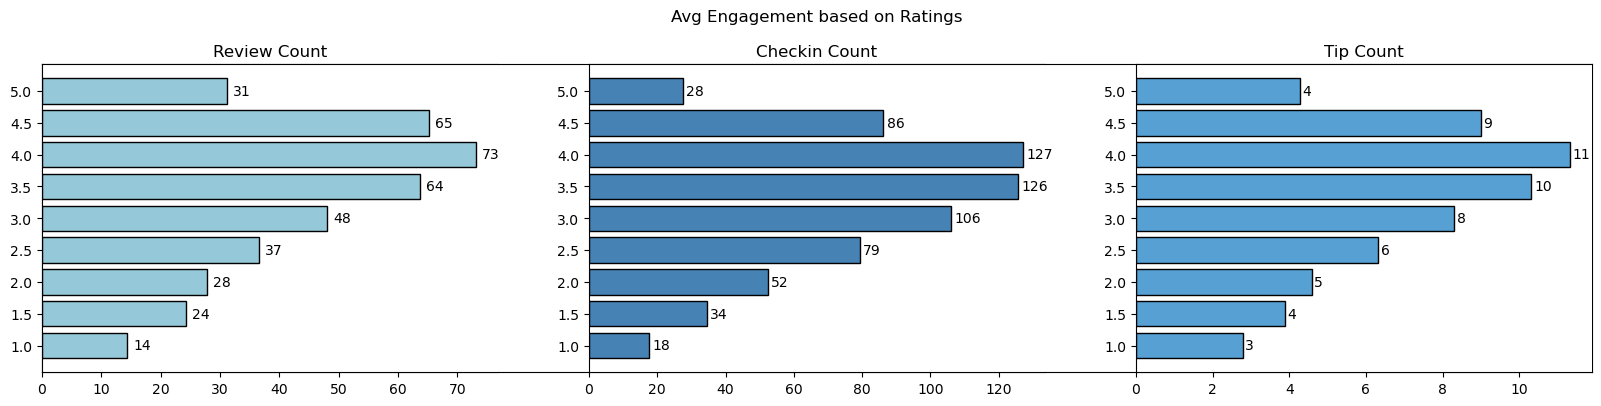

In [17]:
plt.figure(figsize = (20, 4))
plt.title('Avg Engagement based on Ratings\n\n')
plt.xticks([])
plt.yticks([])
plt.subplot(1,3,1)
plt.title('Review Count')
plt.barh(rating_data_df['rating'].astype('str'), rating_data_df['avg_review_count'], edgecolor = 'k', color = '#95C8D8')
plt.gca().spines['right'].set_visible(False)
for i, value in enumerate(rating_data_df['avg_review_count']):
   plt.text(value + 1, i, str(round(value)), color='black', va='center')

plt.subplot(1,3,2)
plt.title('Checkin Count')
plt.barh(rating_data_df['rating'].astype('str'), rating_data_df['avg_checkin_count'], edgecolor = 'k', color = '#4682B4')
plt.gca().spines['right'].set_visible(False)
for i, value in enumerate(rating_data_df['avg_checkin_count']):
   plt.text(value + 1, i, str(round(value)), color='black', va='center')

plt.subplot(1,3,3)
plt.title('Tip Count')
plt.barh(rating_data_df['rating'].astype('str'), rating_data_df['avg_tip_count'], edgecolor = 'k', color = '#57A0D3')
plt.gca().spines['right'].set_visible(False)
for i, value in enumerate(rating_data_df['avg_tip_count']):
   plt.text(value + 0.07, i, str(round(value)), color='black', va='center')



In [18]:
# Is their any correlation between reviews , tips and checkins in the business? 

engagement_df = pd.read_sql_query(f"""select b.business_id, sum(review_count) as review_counts,
                         avg(stars) as avg_rating,
                         sum(length(c.date)-length(replace(c.date, ',', ''))+1) as checkin_counts,
                         t.tot_tip,
                         (CASE WHEN stars <= 3.5 THEN 'low_rated' ELSE 'high_rated' END) as category
                         from business b
                         left join checkin c
                         on b.business_id = c.business_id
                         left join (select business_id, count(*) as tot_tip from tip
                                     group by business_id) as t
                         on b.business_id = t.business_id
                         where b.business_id IN {tuple(open_restaurant['business_id'])}
                         group by b.business_id
                     """, conn).dropna()

In [19]:
engagement_df

,business_id,review_counts,avg_rating,checkin_counts,tot_tip,category
0,---kPU91CF4Lq2-WlRu9Lw,24,4.5,11.0,4.0,high_rated
1,--0iUa4sNDFiZFrAdIWhZQ,14,3.0,10.0,6.0,low_rated
2,--epgcb7xHGuJ-4PUeSLAw,34,3.0,118.0,6.0,low_rated
4,--lqIzK-ZVTtgwiQM63XgQ,15,2.0,21.0,2.0,low_rated
5,-09Oc2D14vRnmirPh0vlXw,135,3.0,500.0,25.0,low_rated
...,...,...,...,...,...,...
31530,zzIF9qp2UoHN48EeZH_IDg,19,3.0,6.0,5.0,low_rated
31532,zzbZtgPYZS8sTIWQH6DwEw,86,3.0,292.0,17.0,low_rated
31533,zziDpuuJw-Km1J4BaGpBKA,6,3.5,20.0,2.0,low_rated
31534,zzjFdJwXuxBOGe9JeY_EMw,47,4.0,27.0,2.0,high_rated


In [20]:
engagement_df[['review_counts', 'checkin_counts', 'tot_tip']].corr()

,review_counts,checkin_counts,tot_tip
review_counts,1.000000,0.626884,0.766321
checkin_counts,0.626884,1.000000,0.772088
tot_tip,0.766321,0.772088,1.000000


<Axes: >

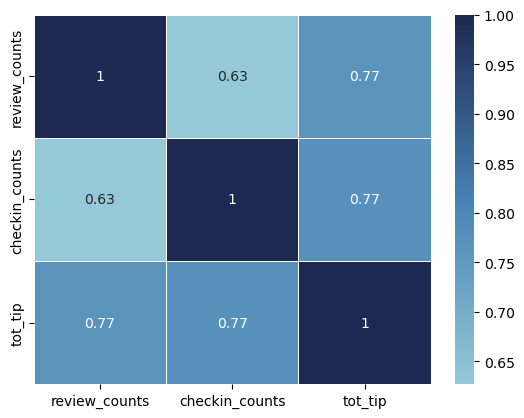

In [21]:
colors = ["#95C8D8", "#4682B4",  "#1D2951"]
custom_cmap = LinearSegmentedColormap.from_list("mуmaр", colors)
sns.heatmap(engagement_df[['review_counts', 'checkin_counts', 'tot_tip']].corr(), cmap = custom_cmap, annot = True, linewidths=0.5,
linecolor = 'white')


In [22]:
# Is there a difference in user engagement(reviews, tips, checkins) between lowrated and high rated business?

engagement_df.groupby('category')[['review_counts', 'checkin_counts', 'tot_tip']].mean()

,review_counts,checkin_counts,tot_tip
category,,,
high_rated,74.299375,115.681302,10.065121
low_rated,52.390839,106.919161,8.039871


In [23]:
# function to calculate success rate based on total review count and avg ratings.

def calculate_success_metric(df):
    success_score = []
    
    for index, row in df.iterrows():
        score =  row['avg_rating']* np.log(row['review_counts'] + 1)
        success_score.append(score)
        
    return success_score

In [24]:
engagement_df['success_score'] = calculate_success_metric(engagement_df)

In [25]:
engagement_df

,business_id,review_counts,avg_rating,checkin_counts,tot_tip,category,success_score
0,---kPU91CF4Lq2-WlRu9Lw,24,4.5,11.0,4.0,high_rated,14.484941
1,--0iUa4sNDFiZFrAdIWhZQ,14,3.0,10.0,6.0,low_rated,8.124151
2,--epgcb7xHGuJ-4PUeSLAw,34,3.0,118.0,6.0,low_rated,10.666044
4,--lqIzK-ZVTtgwiQM63XgQ,15,2.0,21.0,2.0,low_rated,5.545177
5,-09Oc2D14vRnmirPh0vlXw,135,3.0,500.0,25.0,low_rated,14.737965
...,...,...,...,...,...,...,...
31530,zzIF9qp2UoHN48EeZH_IDg,19,3.0,6.0,5.0,low_rated,8.987197
31532,zzbZtgPYZS8sTIWQH6DwEw,86,3.0,292.0,17.0,low_rated,13.397724
31533,zziDpuuJw-Km1J4BaGpBKA,6,3.5,20.0,2.0,low_rated,6.810686
31534,zzjFdJwXuxBOGe9JeY_EMw,47,4.0,27.0,2.0,high_rated,15.484804


In [26]:
# How does success metrics (review_count and avg_rating) of restaurant vary across different citiees and state?

city_wise_df = pd.read_sql_query(f"""select 
                     state, city, latitude, longitude, sum(review_count) as review_counts,
                     avg(stars) as avg_rating, count(*)as business_count
                     from business
                     where business_id IN {tuple(open_restaurant['business_id'])}
                     group by state, city 
                     order by review_counts desc """, conn)

In [27]:
city_wise_df['success_metric'] = calculate_success_metric(city_wise_df)

In [28]:
city_wise_df

,state,city,latitude,longitude,review_counts,avg_rating,business_count,success_metric
0,PA,Philadelphia,39.955505,-75.155564,175487,3.532156,3001,42.651934
1,FL,Tampa,27.890814,-82.502346,104376,3.571429,1715,41.270588
2,IN,Indianapolis,39.637133,-86.127217,92639,3.412111,1701,39.022521
3,AZ,Tucson,32.338572,-111.010760,91613,3.386187,1419,38.688341
4,TN,Nashville,36.208102,-86.768170,87070,3.493590,1404,39.737764
...,...,...,...,...,...,...,...,...
847,PA,Swedeland,40.087088,-75.330058,5,4.000000,1,7.167038
848,PA,Trainer,39.831065,-75.406316,5,4.500000,1,8.062918
849,PA,W.Chester,39.964925,-75.594597,5,3.000000,1,5.375278
850,TN,Rural Hill,36.124624,-86.519456,5,4.000000,1,7.167038


In [29]:
# Create a base map
m = folium.Map(location=[city_wise_df['latitude'].mean(), city_wise_df['longitude'].mean()], zoom_start=4)

# Define a color scale
color_scale = folium.LinearColormap(colors = ['green', "yellow", "red"], 
                                    vmin = city_wise_df['success_metric'].min(),
                                   vmax = city_wise_df['success_metric'].max())

#Add markers to the map
for index, row in city_wise_df.iterrows():
    folium.CircleMarker(
        location = (row['latitude'], row['longitude']),
        radius = 5,
        color = color_scale(row['success_metric']),
        fill = True,
        fill_color = color_scale(row['success_metric']),
        fill_opacity = 0.7,
        popup = f"Success Score: {round(row['success_metric'], 2)}"
    ).add_to(m)

# Add color to the map
m.add_child(color_scale)



In [30]:
# Are there any patterns in user engagement over time for successful businesses compared to less successful ones?
# Are there any seasonal trends in the user engagement for restaurants?

In [31]:
high_rated_engagement = pd.read_sql_query(f"""select reviews.month_year, reviews.review_count,
                      tips.tip_count 
                      from 
                           (select strftime('%m-%Y', date) as month_year,
                            count(*) as review_count 
                            from review 
                            where business_id IN {tuple(open_restaurant['business_id'])} and stars >=3.5
                            group by month_year
                            order by month_year) as reviews
                      join 
                            (select strftime('%m-%Y', t.date) as month_year,
                            count(t.text) as tip_count
                            from tip t
                            join business b
                            on t.business_id = b.business_id
                            where t.business_id IN {tuple(open_restaurant['business_id'])} and b.stars >= 3.5
                            group by month_year
                            order by month_year) as tips
                      on reviews.month_year = tips.month_year
                      order by reviews.month_year""", conn)

high_rated_engagement

,month_year,review_count,tip_count
0,01-2010,1218,79
1,01-2011,2171,621
2,01-2012,3086,1321
3,01-2013,3801,1230
4,01-2014,4973,1357
...,...,...,...
149,12-2017,10161,1477
150,12-2018,12870,1163
151,12-2019,13756,1161
152,12-2020,11294,937


In [32]:
low_rated_engagement = pd.read_sql_query(f"""select reviews.month_year, reviews.review_count,
                      tips.tip_count 
                      from 
                           (select strftime('%m-%Y', date) as month_year,
                            count(*) as review_count 
                            from review 
                            where business_id IN {tuple(open_restaurant['business_id'])} and stars < 3.5
                            group by month_year
                            order by month_year) as reviews
                      join 
                            (select strftime('%m-%Y', t.date) as month_year,
                            count(t.text) as tip_count
                            from tip t
                            join business b
                            on t.business_id = b.business_id
                            where t.business_id IN {tuple(open_restaurant['business_id'])} and b.stars < 3.5
                            group by month_year
                            order by month_year) as tips
                      on reviews.month_year = tips.month_year
                      order by reviews.month_year""", conn)

low_rated_engagement

,month_year,review_count,tip_count
0,01-2010,613,25
1,01-2011,1103,297
2,01-2012,1748,538
3,01-2013,2196,548
4,01-2014,2769,607
...,...,...,...
149,12-2017,5970,441
150,12-2018,7574,338
151,12-2019,7591,275
152,12-2020,5014,148


In [33]:
time_rating = pd.read_sql_query(f"""select strftime('%m-%Y', date) as month_year, 
                                   avg(stars) as avg_rating
                                   from review
                                   where business_id IN {tuple(open_restaurant['business_id'])}
                                   group by month_year
                                   order by month_year""", conn)

In [34]:
time_rating

,month_year,avg_rating
0,01-2006,4.000000
1,01-2007,3.897436
2,01-2008,3.603960
3,01-2009,3.690661
4,01-2010,3.724194
...,...,...
198,12-2017,3.613415
199,12-2018,3.608687
200,12-2019,3.665246
201,12-2020,3.833701


In [35]:
time_rating['month_year'] = pd.to_datetime(time_rating['month_year'])
time_rating.sort_values('month_year', inplace = True)
time_rating = time_rating[time_rating['month_year'] > '2017']

low_rated_engagement['month_year'] = pd.to_datetime(low_rated_engagement['month_year'])
low_rated_engagement.sort_values('month_year', inplace = True)
low_rated_engagement = low_rated_engagement[low_rated_engagement['month_year'] > '2017']

high_rated_engagement['month_year'] = pd.to_datetime(high_rated_engagement['month_year'])
high_rated_engagement.sort_values('month_year', inplace = True)
high_rated_engagement = high_rated_engagement[high_rated_engagement['month_year'] > '2017']

In [36]:
time_rating

,month_year,avg_rating
28,2017-02-01,3.636779
45,2017-03-01,3.641116
62,2017-04-01,3.631225
79,2017-05-01,3.632701
96,2017-06-01,3.676874
113,2017-07-01,3.671755
130,2017-08-01,3.686479
147,2017-09-01,3.630508
164,2017-10-01,3.657484
181,2017-11-01,3.678227


In [37]:
low_rated_engagement

,month_year,review_count,tip_count
20,2017-02-01,5505,458
32,2017-03-01,6134,555
45,2017-04-01,6195,580
58,2017-05-01,6654,609
71,2017-06-01,6369,574
84,2017-07-01,6910,578
97,2017-08-01,6235,528
110,2017-09-01,5936,441
123,2017-10-01,6136,485
136,2017-11-01,5561,426


In [38]:
high_rated_engagement

,month_year,review_count,tip_count
20,2017-02-01,9607,1677
32,2017-03-01,10852,2101
45,2017-04-01,10734,2124
58,2017-05-01,11590,2019
71,2017-06-01,11723,2015
84,2017-07-01,12548,2056
97,2017-08-01,11582,1843
110,2017-09-01,10335,1597
123,2017-10-01,10961,1644
136,2017-11-01,10298,1483


In [39]:
high_rated_engagement['avg_ratings'] = time_rating['avg_rating'].values
low_rated_engagement['avg_ratings'] = time_rating['avg_rating'].values

In [40]:
high_rated_engagement

,month_year,review_count,tip_count,avg_ratings
20,2017-02-01,9607,1677,3.636779
32,2017-03-01,10852,2101,3.641116
45,2017-04-01,10734,2124,3.631225
58,2017-05-01,11590,2019,3.632701
71,2017-06-01,11723,2015,3.676874
84,2017-07-01,12548,2056,3.671755
97,2017-08-01,11582,1843,3.686479
110,2017-09-01,10335,1597,3.630508
123,2017-10-01,10961,1644,3.657484
136,2017-11-01,10298,1483,3.678227


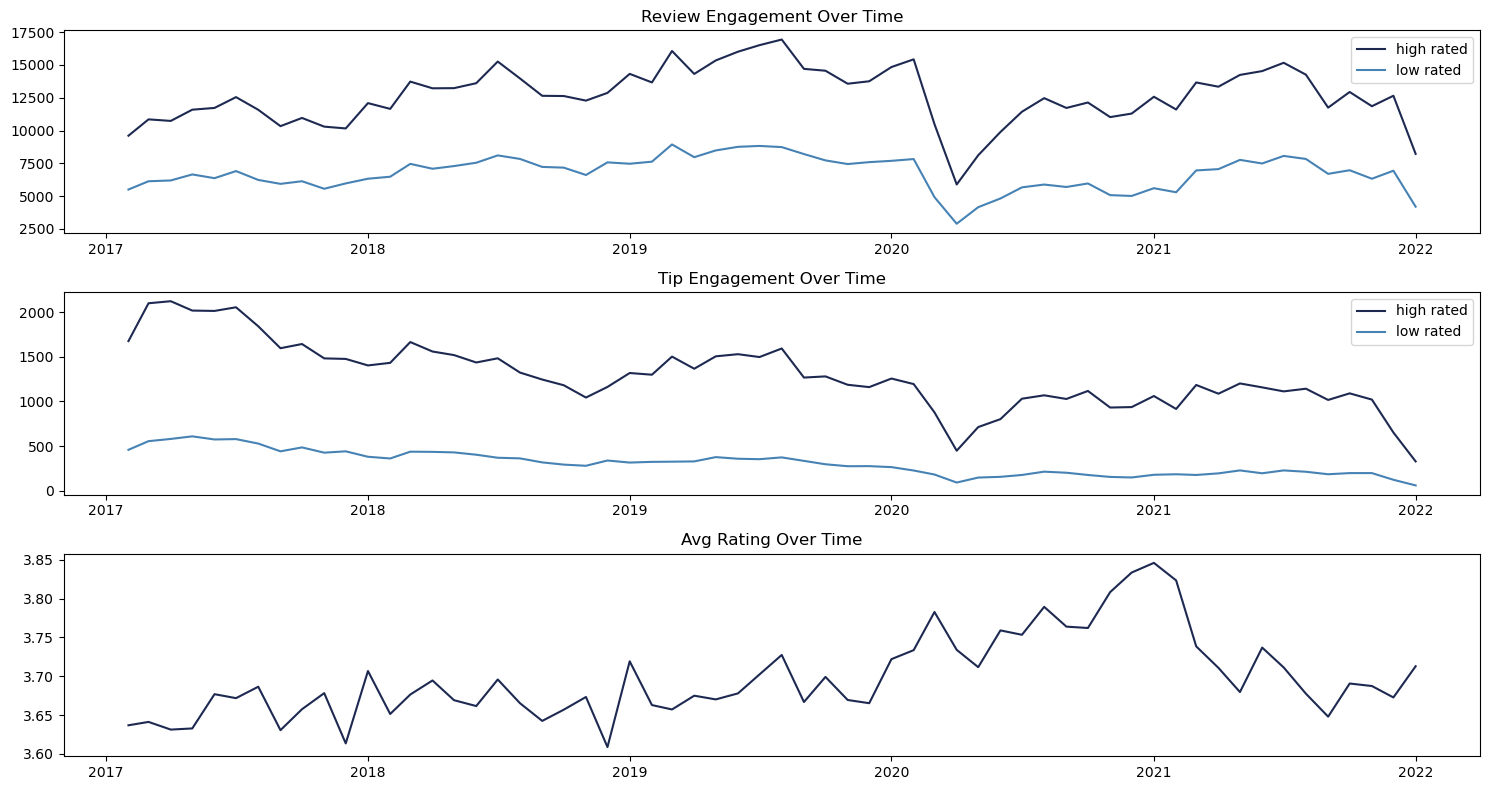

In [41]:
plt.figure(figsize = (15,8))
plt.subplot(3,1,1)
plt.title('Review Engagement Over Time')
plt.plot(high_rated_engagement['month_year'], high_rated_engagement['review_count'], label = 'high rated', color = '#1D2951')
plt.plot(low_rated_engagement['month_year'], low_rated_engagement['review_count'], label = 'low rated', color = '#4682B4')
plt.legend()

plt.subplot(3,1,2)
plt.title('Tip Engagement Over Time')
plt.plot(high_rated_engagement['month_year'], high_rated_engagement['tip_count'], label = 'high rated', color = '#1D2951')
plt.plot(low_rated_engagement['month_year'], low_rated_engagement['tip_count'], label = 'low rated', color = '#4682B4')
plt.legend()

plt.subplot(3,1,3)
plt.title('Avg Rating Over Time')
plt.plot(time_rating['month_year'], time_rating['avg_rating'], label = 'high rated', color = '#1D2951')

plt.tight_layout()
plt.show()

In [42]:
tip_high_rated = high_rated_engagement[['month_year', 'tip_count']].set_index('month_year')
review_high_rated = high_rated_engagement[['month_year', 'review_count']].set_index('month_year')
ratings_high_rated = high_rated_engagement[['month_year', 'avg_ratings']].set_index('month_year')

In [43]:
ratings_high_rated

,avg_ratings
month_year,
2017-02-01,3.636779
2017-03-01,3.641116
2017-04-01,3.631225
2017-05-01,3.632701
2017-06-01,3.676874
2017-07-01,3.671755
2017-08-01,3.686479
2017-09-01,3.630508
2017-10-01,3.657484


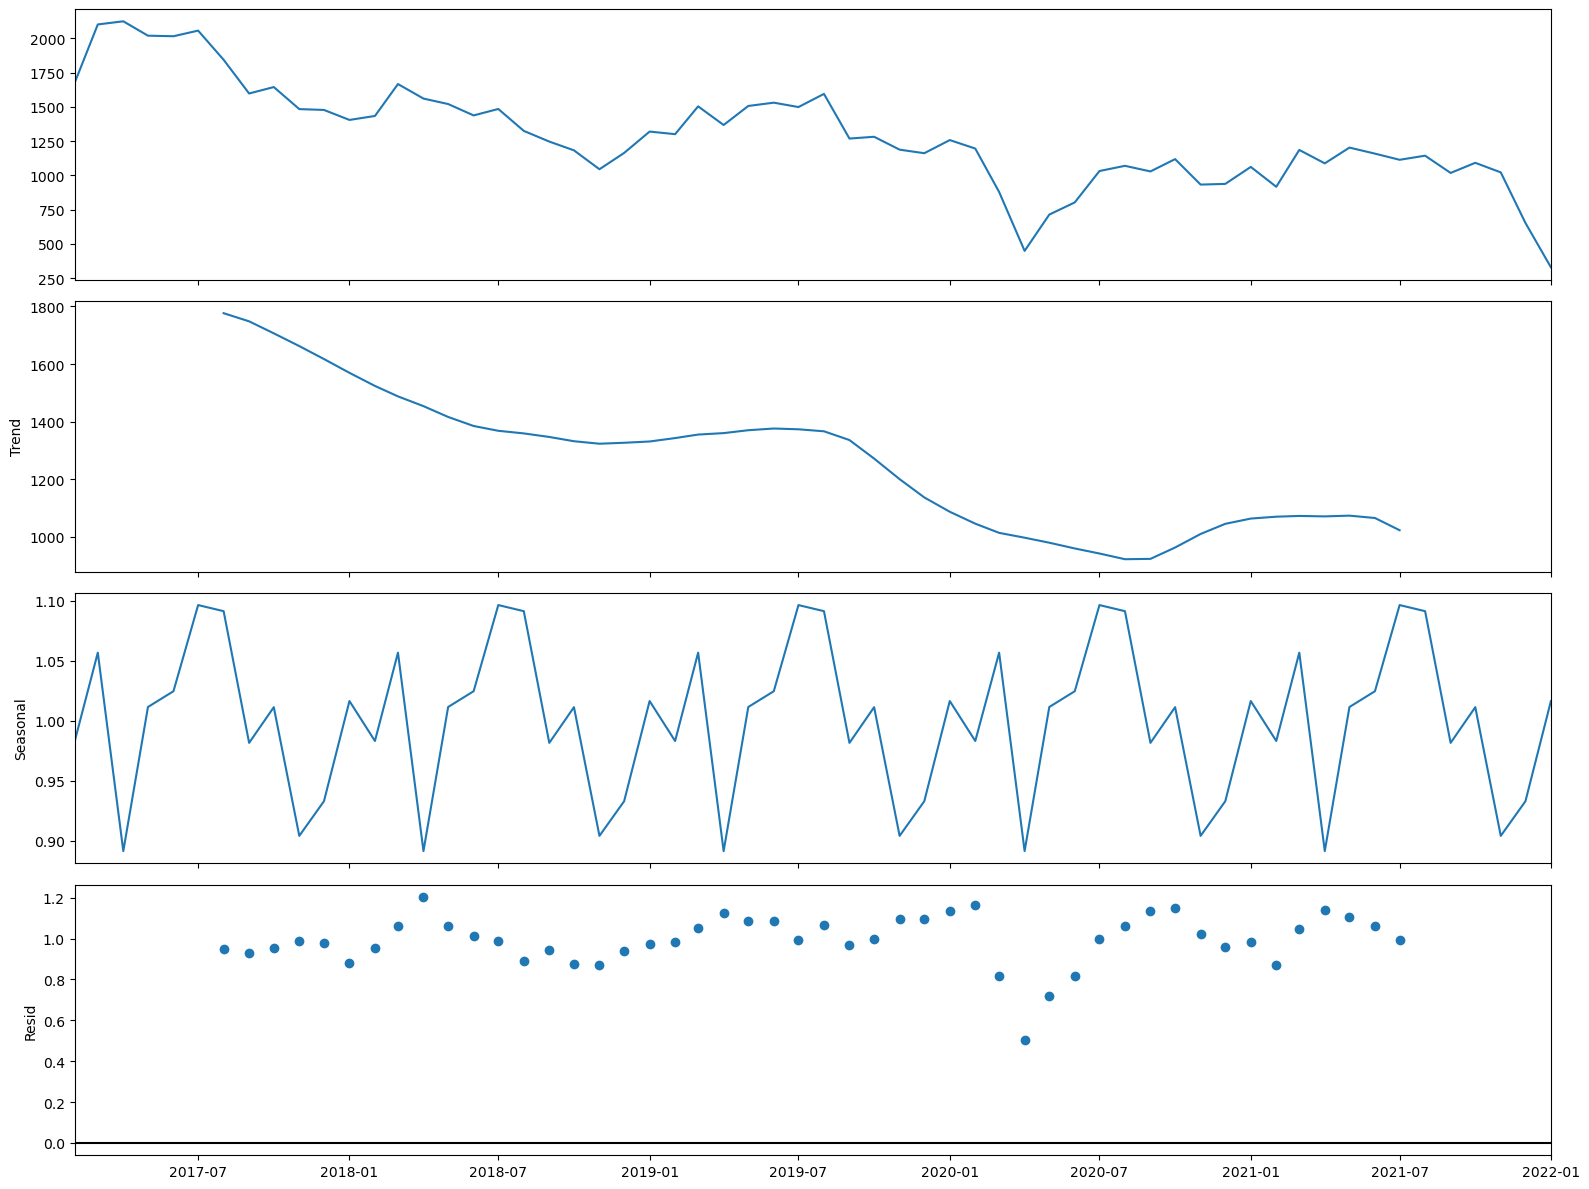

In [44]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Decompose the time series
multiplicative_decomposition = seasonal_decompose(tip_high_rated, model='multiplicative', period=12)

# Set plot size
plt.rcParams.update({'figure.figsize': (16, 12)})

# Plot the decomposed components: trend, seasonality, residual
multiplicative_decomposition.plot()
plt.show()

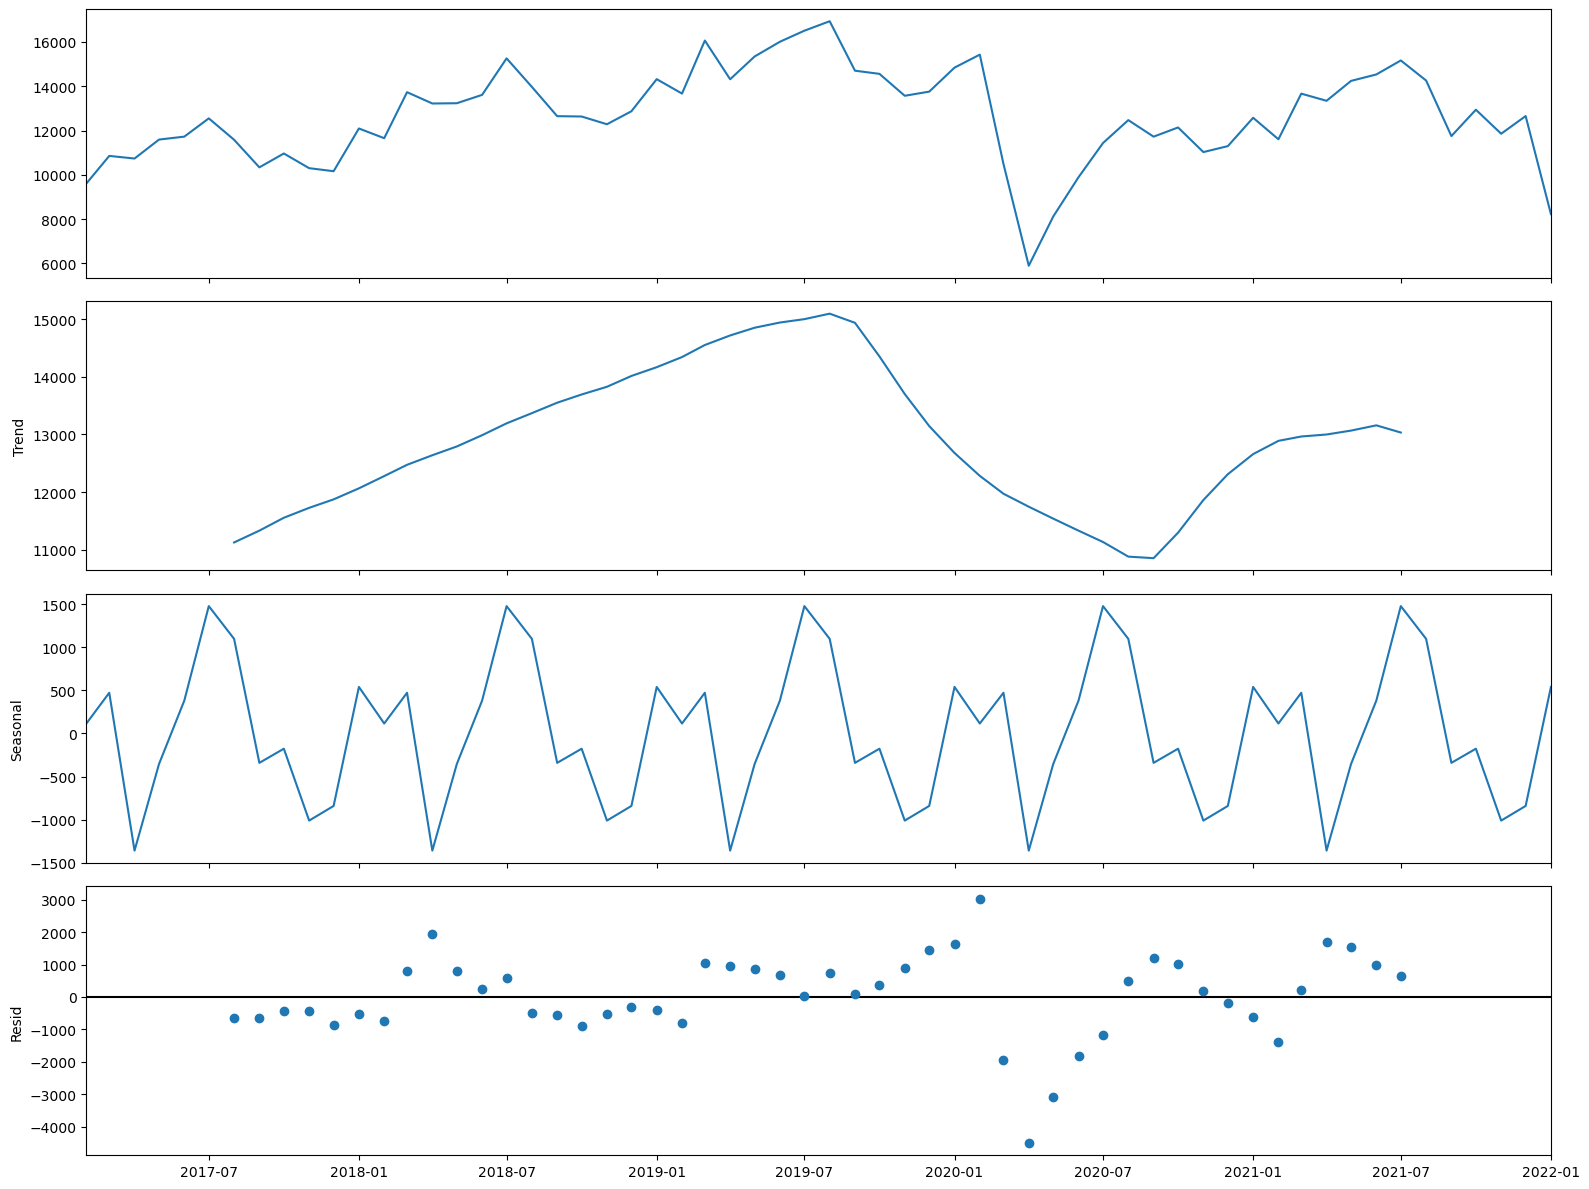

In [45]:
# Decompose the time series
multiplicative_decomposition = seasonal_decompose(review_high_rated, model='addictive', period=12)

# Set plot size
plt.rcParams.update({'figure.figsize': (16, 12)})

# Plot the decomposed components: trend, seasonality, residual
multiplicative_decomposition.plot()
plt.show()

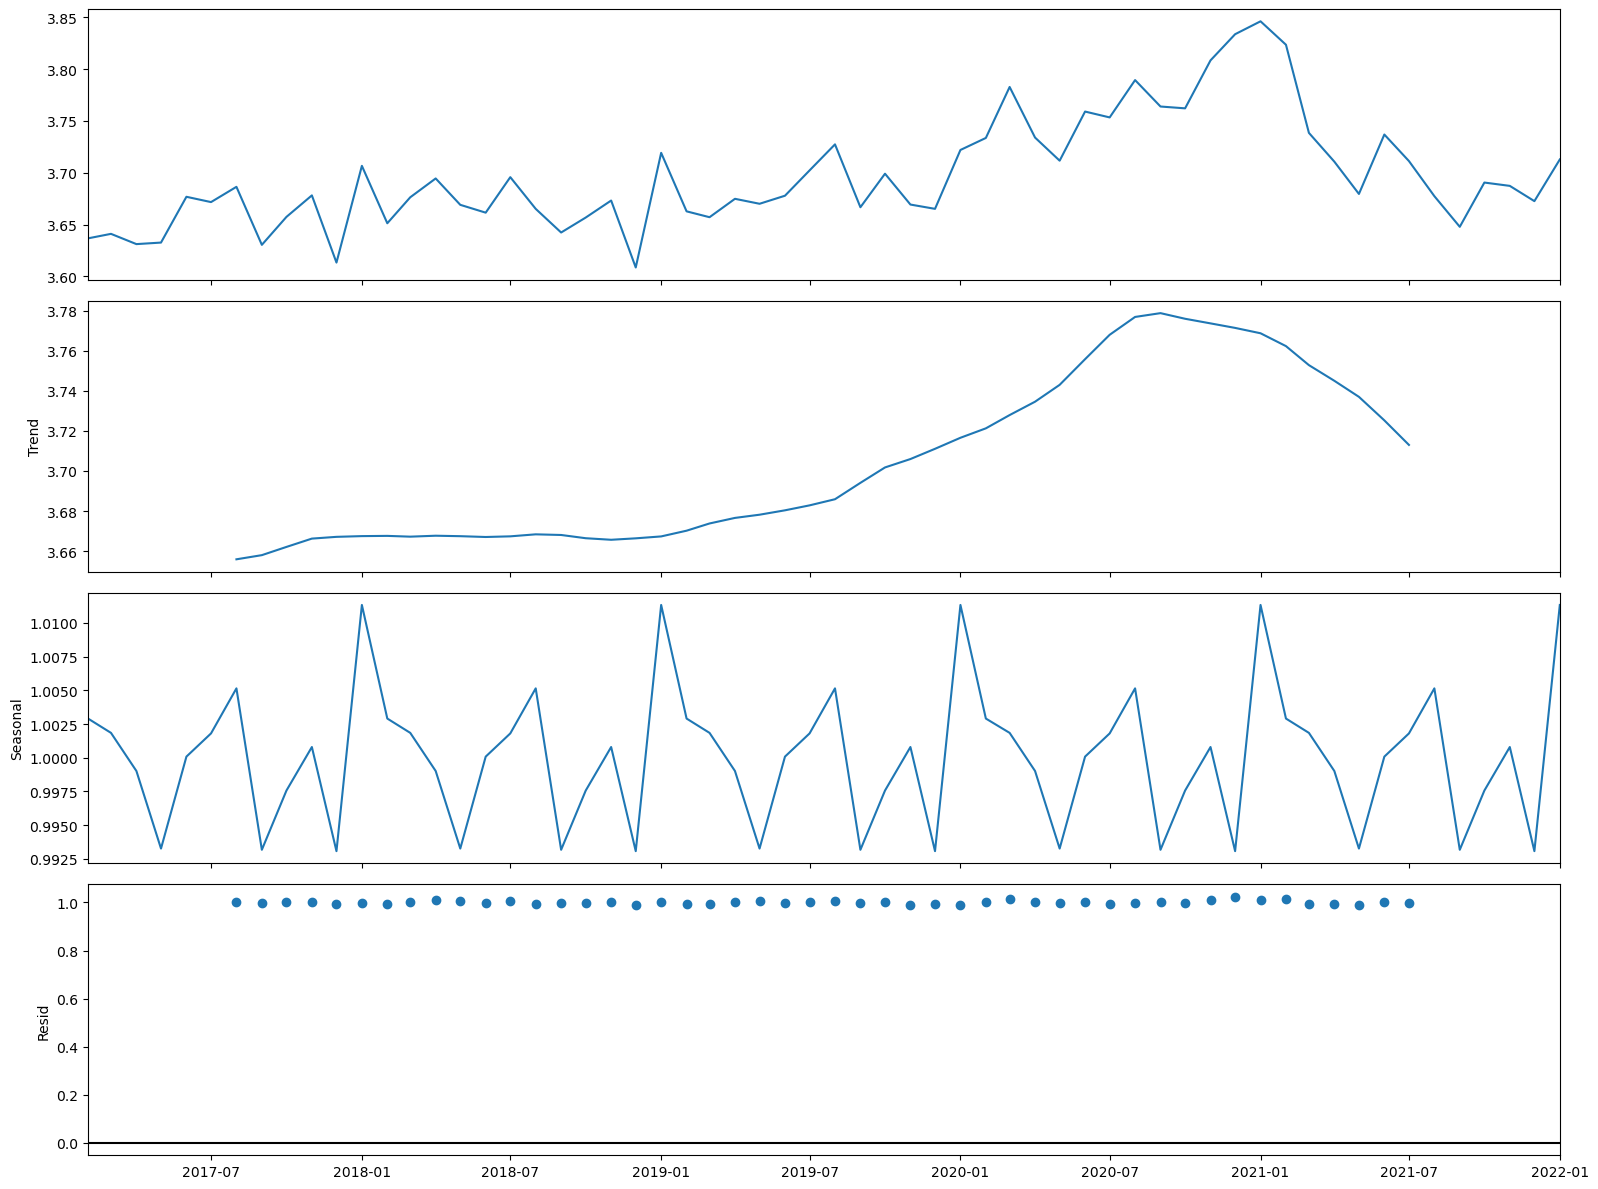

In [46]:
# Decompose the time series
multiplicative_decomposition = seasonal_decompose(ratings_high_rated, model='multiplicative', period=12)

# Set plot size
plt.rcParams.update({'figure.figsize': (16, 12)})

# Plot the decomposed components: trend, seasonality, residual
multiplicative_decomposition.plot()
plt.show()

In [47]:
# How does the sentiment of reviews and tips (useful, funny, cool) correlate with the success metric of the restaurants?

In [48]:
sentiment__df = pd.read_sql_query(f"""select b.business_id, avg(b.stars) as avg_rating, sum(b.review_count) as review_counts,
                      r.useful_count as useful_count, r.funny_count as funny_count,
                      r.cool_count as cool_count
                          from
                             (select business_id, sum(useful) as useful_count,
                                     sum(funny) as funny_count,
                                     sum(cool) as cool_count from review 
                             group by business_id) as r
                             join business b
                             on r.business_id = b.business_id
                             where b.business_id IN {tuple(open_restaurant['business_id'])} 
                             group by b.business_id
                             order by b.review_count""", conn)

In [49]:
# Function to remove otliers:

def remove_outliers(df, col):
    q1 = df[col].quantile(.25)
    q3 = df[col].quantile(.75)
    iqr = q3 - q1
    
    lower_fence = q1 - 1.5*iqr
    higher_fence = q3 +1.5*iqr
    df = df[(df[col]>= lower_fence) & (df[col]<= higher_fence)]
    return df

In [50]:
sentiment__df = remove_outliers(sentiment__df, 'review_counts')
sentiment__df = remove_outliers(sentiment__df, 'useful_count')
sentiment__df = remove_outliers(sentiment__df, 'cool_count')
sentiment__df = remove_outliers(sentiment__df, 'funny_count')

In [51]:
sentiment__df

,business_id,avg_rating,review_counts,useful_count,funny_count,cool_count
0,-2CPhK6ik9ZBgFX_F-dkxQ,2.0,5,3,5,3
1,-3ArWZfDjfab8qVHf3WVtg,4.0,5,18,3,2
2,-4lNMmoW7gRxkH0c2dfXfA,4.0,5,1,0,0
3,-7UDKbg_8TL4LVuYR6Ooyw,3.0,5,3,0,2
4,-AzaeuPwxqFO4SMSKjbuCw,3.0,5,5,0,0
...,...,...,...,...,...,...
29627,radib3GHt_Up9-zhUjM1ew,3.5,175,128,29,21
29633,17AnbEkqAiE66YFTDYFvgw,2.5,176,110,25,25
29652,ZNZcptwIHne1PDcHaMbA-A,4.0,176,81,13,29
29664,k8C4zFZDl8GcjIapHCB77w,4.0,176,91,23,29


In [52]:
sentiment__df['success_metric'] = calculate_success_metric(sentiment__df)

In [53]:
sentiment__df

,business_id,avg_rating,review_counts,useful_count,funny_count,cool_count,success_metric
0,-2CPhK6ik9ZBgFX_F-dkxQ,2.0,5,3,5,3,3.583519
1,-3ArWZfDjfab8qVHf3WVtg,4.0,5,18,3,2,7.167038
2,-4lNMmoW7gRxkH0c2dfXfA,4.0,5,1,0,0,7.167038
3,-7UDKbg_8TL4LVuYR6Ooyw,3.0,5,3,0,2,5.375278
4,-AzaeuPwxqFO4SMSKjbuCw,3.0,5,5,0,0,5.375278
...,...,...,...,...,...,...,...
29627,radib3GHt_Up9-zhUjM1ew,3.5,175,128,29,21,18.096694
29633,17AnbEkqAiE66YFTDYFvgw,2.5,176,110,25,25,12.940374
29652,ZNZcptwIHne1PDcHaMbA-A,4.0,176,81,13,29,20.704599
29664,k8C4zFZDl8GcjIapHCB77w,4.0,176,91,23,29,20.704599


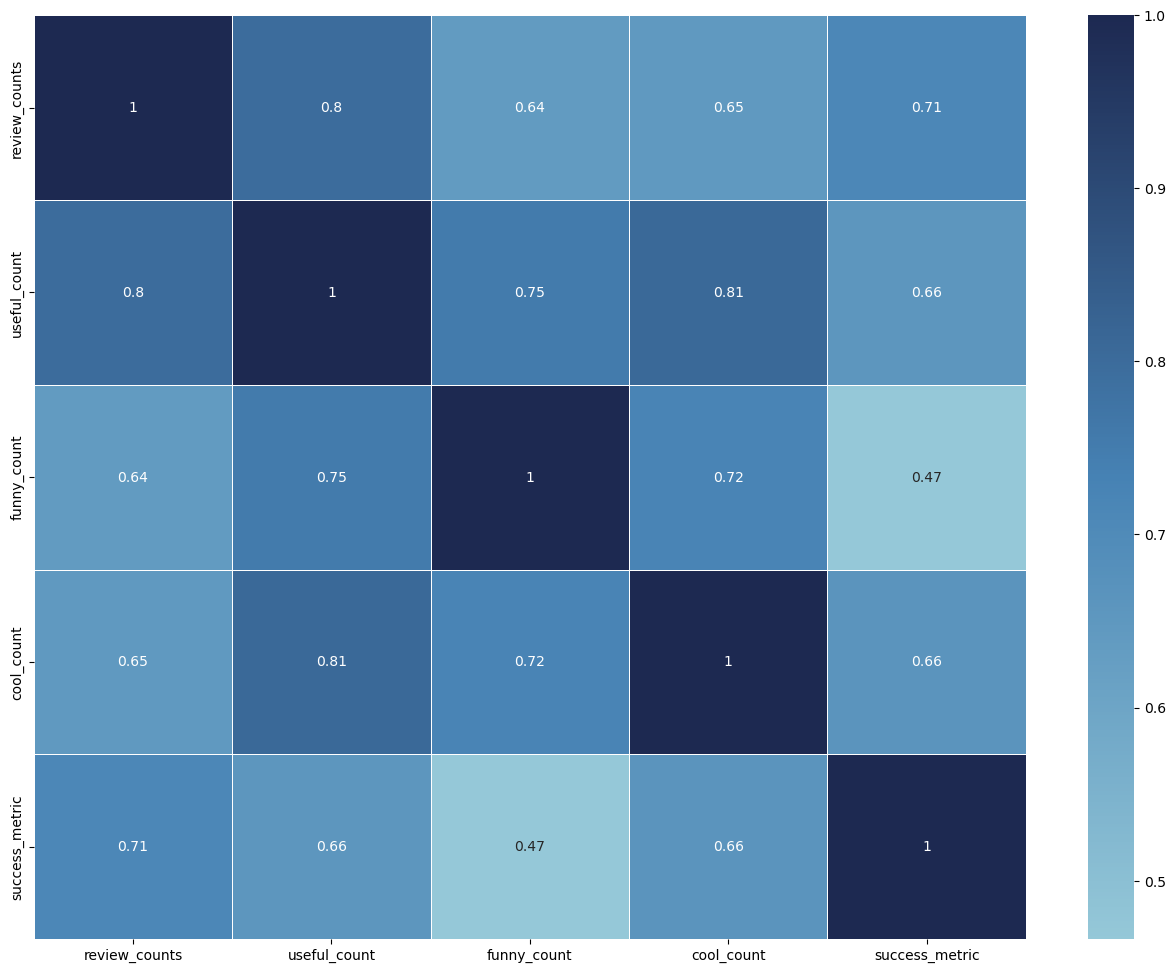

In [54]:
sns.heatmap(sentiment__df.iloc[:,2:].corr(), cmap = custom_cmap, annot = True, linewidths=0.5,
linecolor = 'white')
plt.show()

In [55]:
# Is there any difference in the engagement of elite users and non-elite users?

elite_df = pd.read_sql_query("""select e, sum(review_count) as review_count, 
                     count(*) as elite_user_count
                        from
                        (select *, 
                        CASE WHEN elite = '' THEN 'non-elite' ELSE 'elite' END as e
                        from user)
                        group by e""", conn)

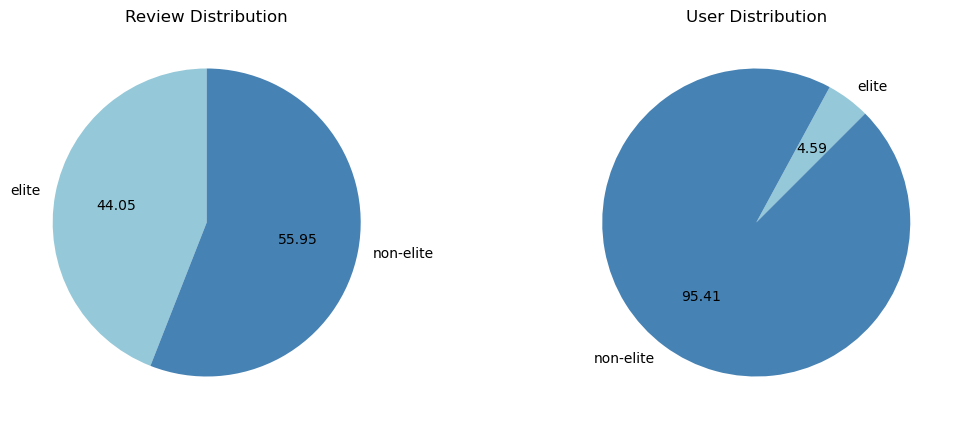

In [56]:
plt.figure(figsize = (13, 5))
plt.subplot(1, 2, 1)
plt.title('Review Distribution')
plt.pie(elite_df['review_count'], labels = elite_df['e'], autopct = '%.2f',colors = ["#95C8D8", '#4682B4'], startangle = 90)

plt.subplot(1, 2, 2)
plt.title('User Distribution')
plt.pie(elite_df['elite_user_count'], labels = elite_df['e'], autopct = '%.2f',colors = ["#95C8D8", '#4682B4'], startangle = 45)

plt.show()

In [57]:
# What are the busiest hours for the restaurant?

In [58]:
review_engagement = pd.read_sql_query("""select cast(strftime('%H', date) as integer) as hours, count(*) as review_count
                from review
                group by hours
                order by  review_count desc""", conn)

review_engagement

,hours,review_count
0,18,464488
1,19,463727
2,0,460765
3,1,457189
4,20,452524
5,23,448405
6,17,441397
7,21,439319
8,22,435185
9,2,416472


In [59]:
tip_engagement = pd.read_sql_query("""select cast(strftime('%H', date) as 'int') as hours, count(*) as tip_count
                from tip
                group by hours
                order by  tip_count desc""", conn)
tip_engagement

,hours,tip_count
0,0,74238
1,23,73222
2,1,67568
3,22,65779
4,18,63585
5,17,62076
6,19,60871
7,21,58630
8,20,57240
9,2,54532


In [61]:
checkin = pd.read_sql_query("SELECT date FROM checkin", conn)

checkin_engagement = []
for i in checkin['date']:
    checkin_engagement.extend([datetime.strptime(j.strip(), "%Y-%m-%d %H:%M:%S").strftime("%H") 
     for j in i.split(',')])

checkin_engagement = pd.DataFrame(checkin_engagement).astype(int).groupby(0)[[0]].count()

In [62]:
checkin_engagement

,0
0,
0,1155092
1,935985
2,669574
3,437035
4,264905
5,152476
6,85066
7,52295
8,35589


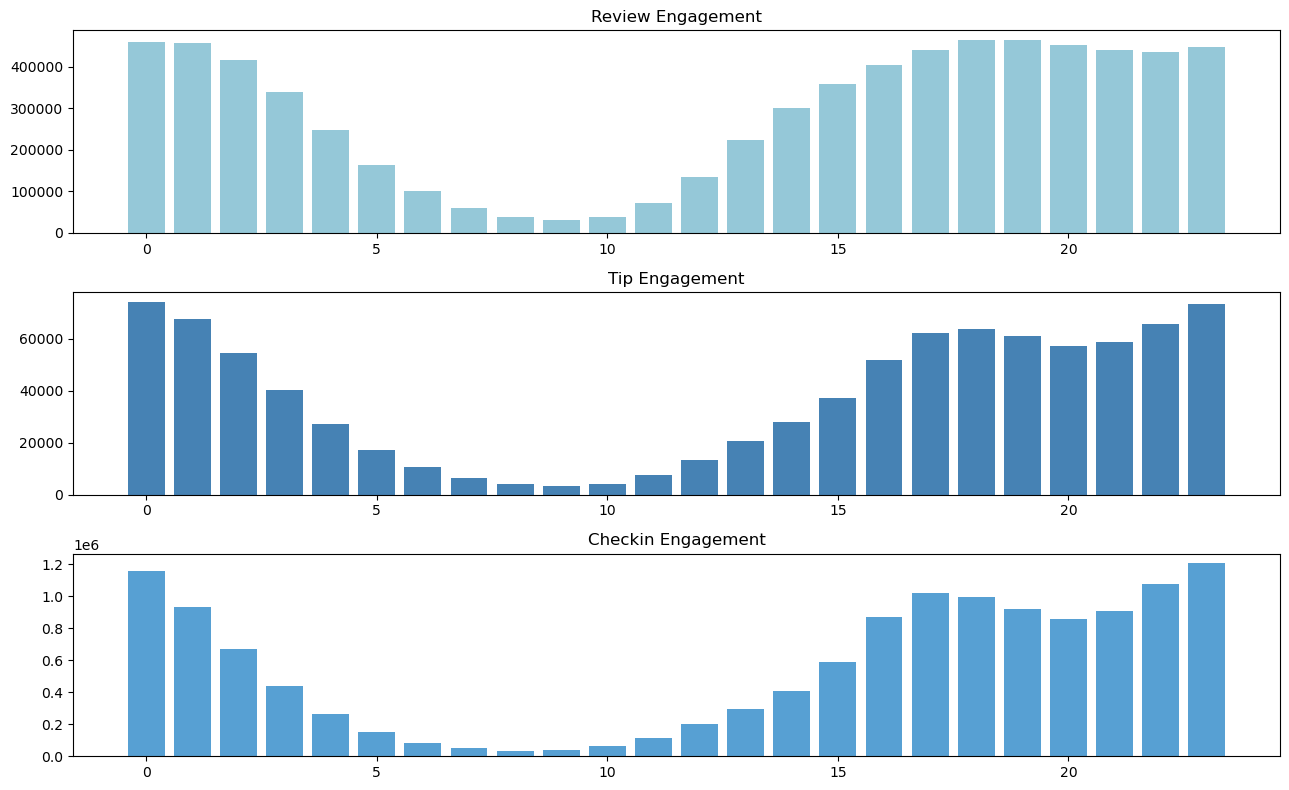

In [69]:
plt.figure(figsize = (13,8))
plt.subplot(3,1,1)
plt.title('Review Engagement')
plt.bar(review_engagement['hours'], review_engagement['review_count'], color = ["#95C8D8"])

plt.subplot(3,1,2)
plt.title('Tip Engagement')
plt.bar(tip_engagement['hours'], tip_engagement['tip_count'], color = ['#4682B4'])

plt.subplot(3,1,3)
plt.title('Checkin Engagement')
plt.bar(checkin_engagement.index, checkin_engagement[0], color = ['#57A0D3'])

plt.tight_layout()
plt.show()